# Logistic regression for multi-class classification

## import libraries

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [162]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [163]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [164]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [165]:
index_train = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
index_test  = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [166]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [167]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

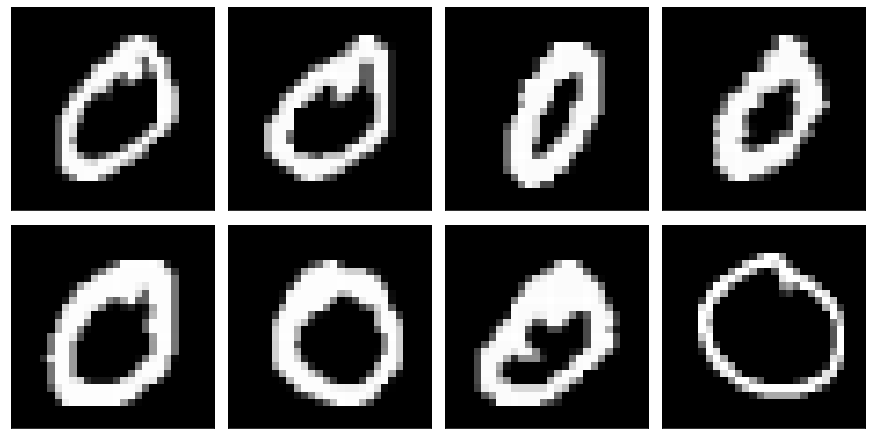

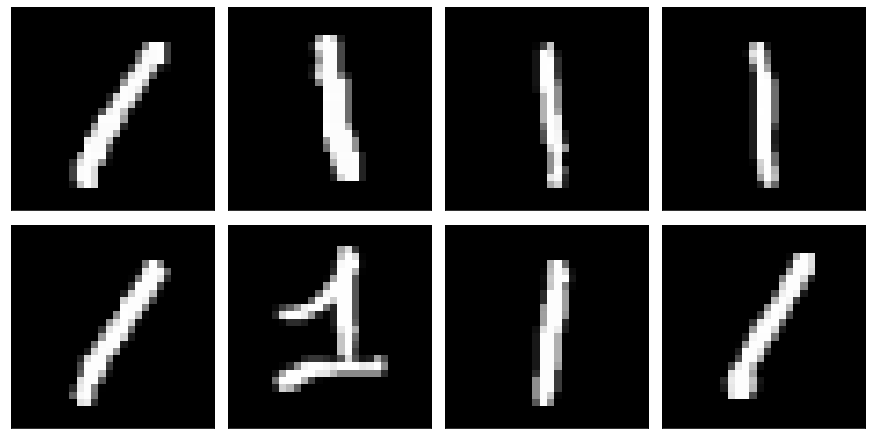

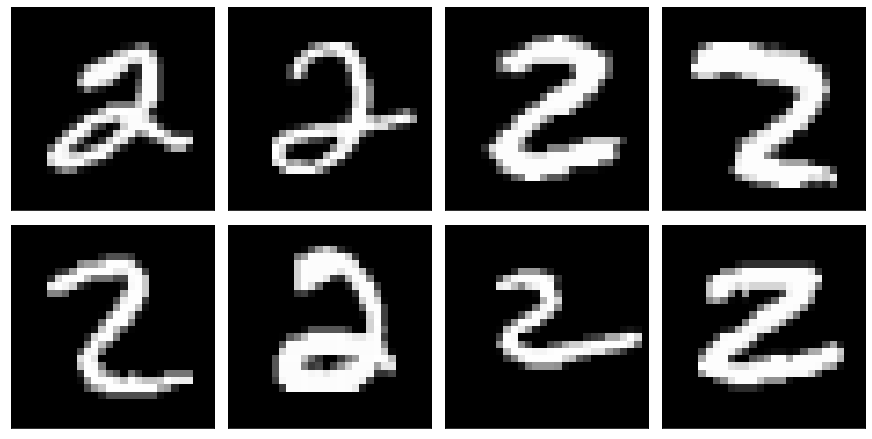

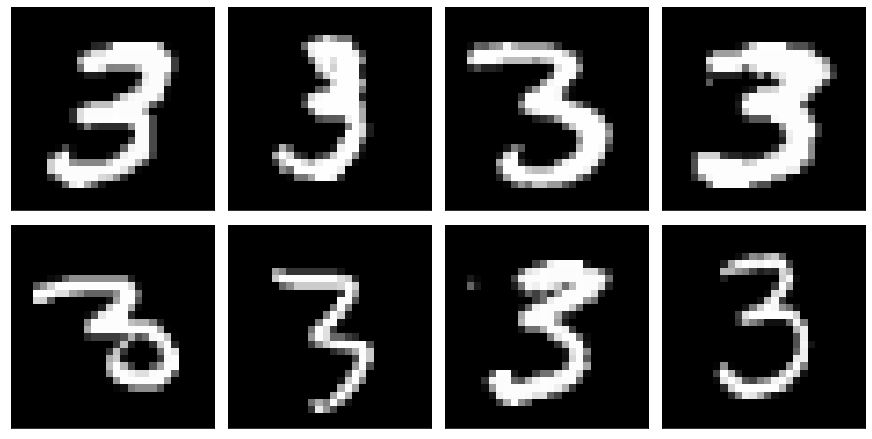

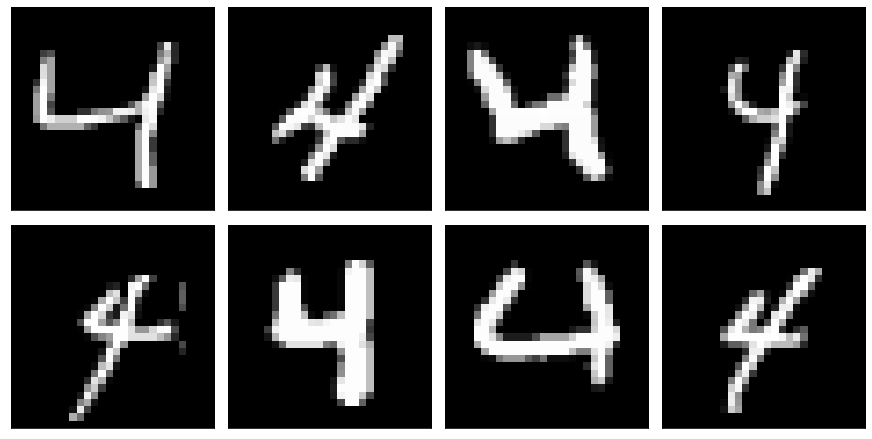

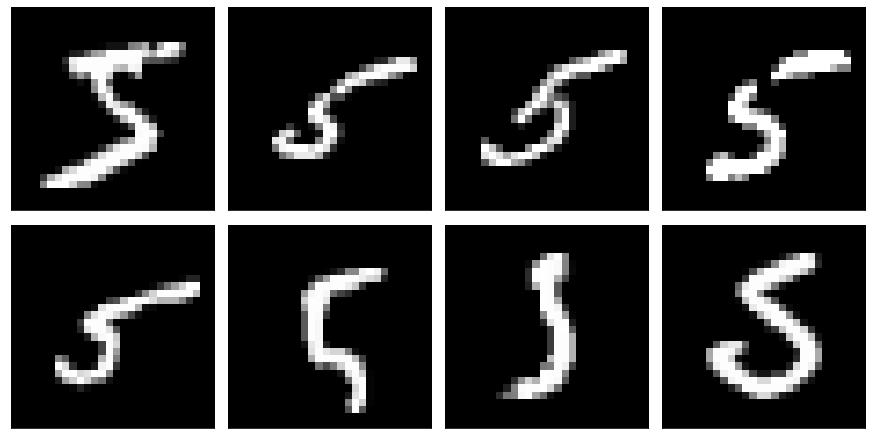

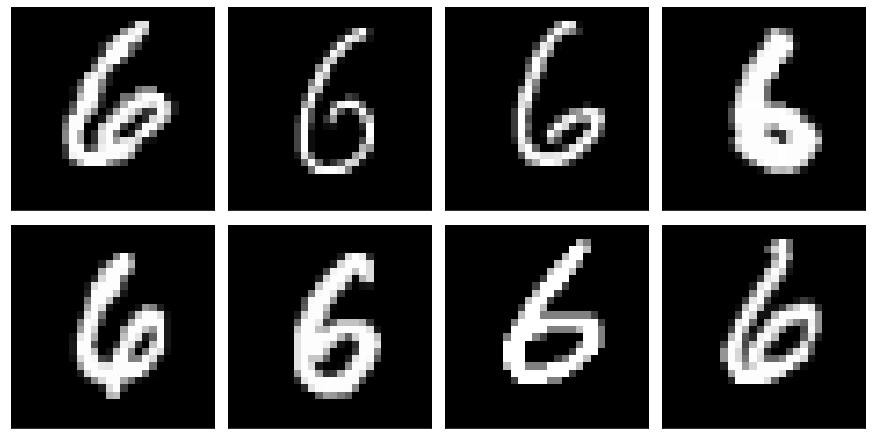

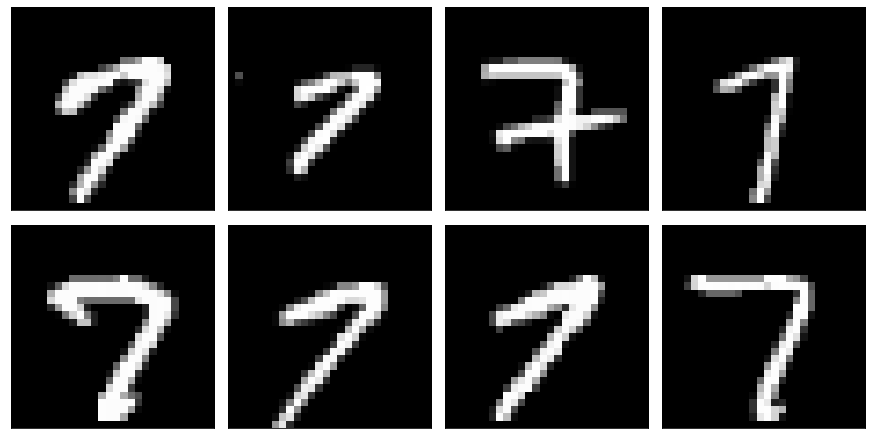

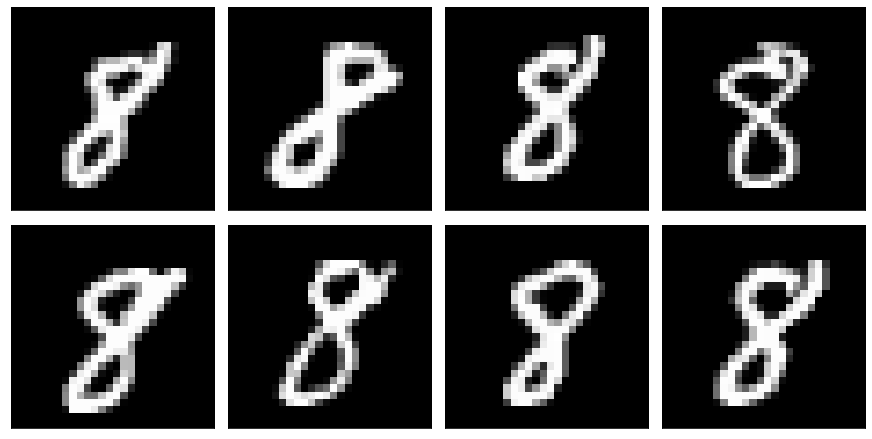

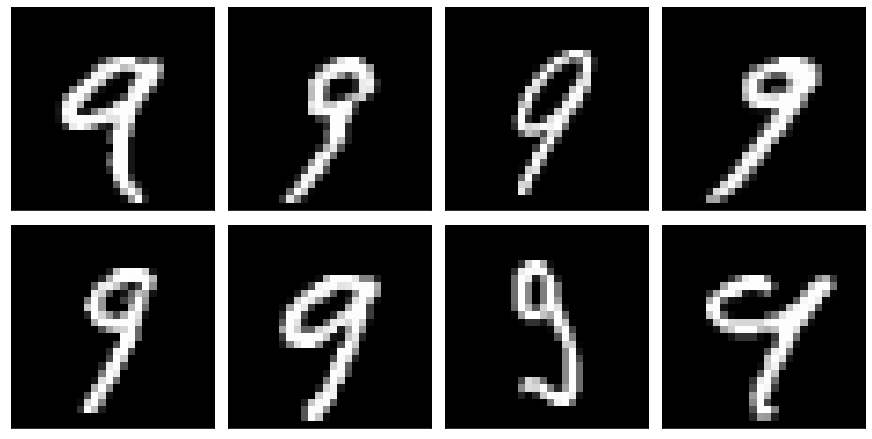

In [168]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [169]:
def layer_linear(input, weight):

    output = np.dot(weight, input.T)

    return output

## Softmax function

In [202]:
def activation_softmax(input):

    output = np.transpose(np.tile((1/ np.sum(np.exp(input.T), axis = 1)), (nClass, 1))) * np.exp(input.T)
    
    return output.T

## compute prediction by the forward propagation of the neural network

In [172]:
def compute_prediction(input, weight):

    prediction = activation_softmax(layer_linear(input, weight))

    return prediction

## compute loss for the cross-entropy term

In [173]:
def compute_loss_cross_entropy(prediction, label):
    
    loss = -np.sum(label * np.log(prediction.T)) / size_minibatch

    return loss

## compute loss for the regularization term

In [175]:
def compute_loss_regularization(alpha, weight):
    
    loss = alpha / 2 * np.sum((weight ** 2))

    return loss

## compute loss function

In [176]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction, label) + compute_loss_regularization(alpha, weight)
    
    return loss

## compute gradient for the cross-entropy term

In [205]:
def compute_gradient_cross_entropy(input, prediction, label):

    # residual = prediction.T - label 
    # s0 = np.sum(np.multiply(residual[:, 0].reshape(len(input),1), input), axis = 0) / len(input)
    # s1 = np.sum(np.multiply(residual[:, 1].reshape(len(input),1), input), axis = 0) / len(input)
    # s2 = np.sum(np.multiply(residual[:, 2].reshape(len(input),1), input), axis = 0) / len(input)
    # s3 = np.sum(np.multiply(residual[:, 3].reshape(len(input),1), input), axis = 0) / len(input)
    # s4 = np.sum(np.multiply(residual[:, 4].reshape(len(input),1), input), axis = 0) / len(input)
    # s5 = np.sum(np.multiply(residual[:, 5].reshape(len(input),1), input), axis = 0) / len(input)
    # s6 = np.sum(np.multiply(residual[:, 6].reshape(len(input),1), input), axis = 0) / len(input)
    # s7 = np.sum(np.multiply(residual[:, 7].reshape(len(input),1), input), axis = 0) / len(input)
    # s8 = np.sum(np.multiply(residual[:, 8].reshape(len(input),1), input), axis = 0) / len(input)
    # s9 = np.sum(np.multiply(residual[:, 9].reshape(len(input),1), input), axis = 0) / len(input)

    # gradient = np.array([s0,s1,s2,s3,s4,s5,s6,s7,s8,s9])
    gradient = (input.T)@(prediction.T - label)/input.shape[0]

    return gradient.T

## compute gradient for the regularization term

In [178]:
def compute_gradient_regularization(alpha, weight):
    
    gradient = alpha * weight

    return gradient

## compute gradient

In [179]:
def compute_gradient(input, prediction, label, alpha, weight):

    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(alpha, weight)

    return gradient

## compute accuracy

In [180]:
def compute_accuracy(prediction, label):

    bCorrect    = np.equal(np.argmax(prediction.T, axis=1),np.argmax(label, axis=1))
    accuracy    = np.sum(bCorrect) / len(prediction.T)
    
    return accuracy

## consider bias in the data

In [181]:
#########################################################################
print(vector_x_train.shape)
one_train   = np.ones([vector_x_train.shape[0],1])
print(one_train)

print(np.concatenate((vector_x_train, one_train), axis = 1).shape)

(20000, 784)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
(20000, 785)


In [182]:
one_train   = np.ones([vector_x_train.shape[0],1])
one_test    = np.ones([vector_x_test.shape[0],1])

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis = 1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis = 1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [183]:
#########################################################################
weight = np.zeros([5, 7])
weight[:,:7-1] = 0.001
weight[:,7-1:] = 1

print(weight)

[[0.001 0.001 0.001 0.001 0.001 0.001 1.   ]
 [0.001 0.001 0.001 0.001 0.001 0.001 1.   ]
 [0.001 0.001 0.001 0.001 0.001 0.001 1.   ]
 [0.001 0.001 0.001 0.001 0.001 0.001 1.   ]
 [0.001 0.001 0.001 0.001 0.001 0.001 1.   ]]


In [184]:
def get_weight(dim_input, dim_output):
    
    weight = np.zeros((dim_output, dim_input))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[:,:dim_input-1] = 0.001
    weight[:,dim_input-1:] = 1

    return weight

In [185]:
dim_input   = vector_x_train_bias.shape[1]  #785
dim_output  = nClass                        #10

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [186]:
number_iteration    = 1000
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]        #beta
list_weight_decay   = [0.001, 0.01, 0.1]    #alpha

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [187]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [188]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [191]:
############################################################################
print(compute_prediction(vector_x_train_bias, weight).shape)

(20000, 10)


In [206]:
# iteration for mini-batch  
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = int(vector_x_train.shape[0] / size_minibatch)
    alpha           = 0

    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))

    weight = get_weight(vector_x_train_bias.shape[1], nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch : (j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient_cross_entropy(data, prediction, label)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

mini-batch size =  50, alpha = 0.000


100%|██████████| 1000/1000 [06:23<00:00,  2.61it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [ ]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = int(vector_x_train.shape[0] / size_minibatch)
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(vector_x_train_bias.shape[1], nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch : (j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient_cross_entropy(data, prediction, label)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


## plot curve

In [199]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [118]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [119]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [200]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [121]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

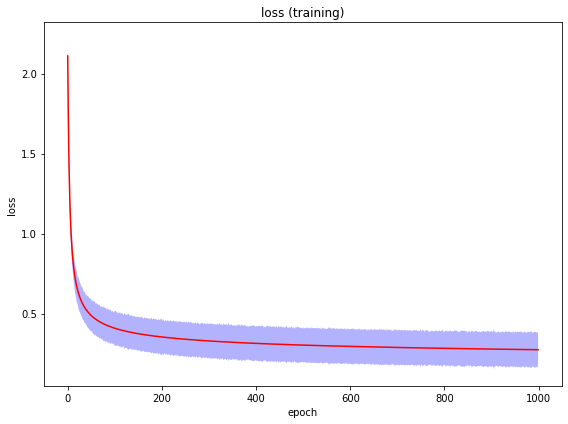

In [207]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

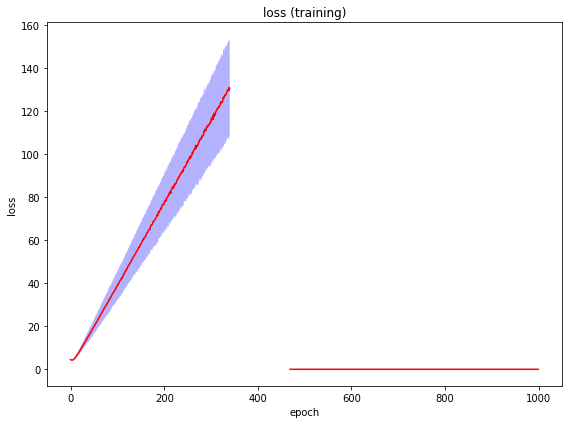

In [123]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

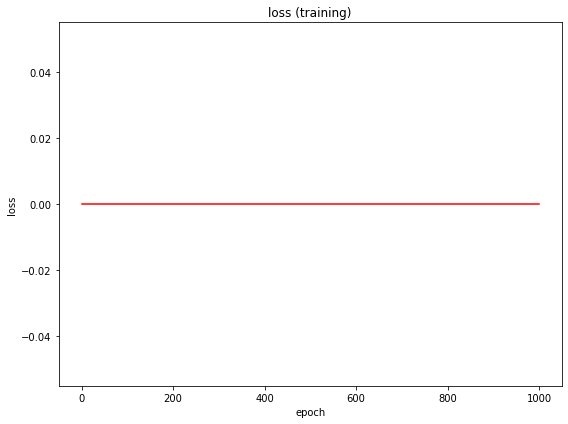

In [124]:

plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

In [ ]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

In [ ]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

In [ ]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

In [ ]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

In [ ]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

In [ ]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

In [ ]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [ ]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [ ]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [ ]:
print_curve(train_loss_mean_minibatch[0], index)

## training loss (mean) : mini-batch = 100, weight-decay = 0

In [ ]:
print_curve(train_loss_mean_minibatch[1], index)

## training loss (mean) : mini-batch = 200, weight-decay = 0

In [ ]:
print_curve(train_loss_mean_minibatch[2], index)

## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [ ]:
print_curve(train_accuracy_mean_minibatch[0], index)

## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [ ]:
print_curve(train_accuracy_mean_minibatch[1], index)

## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [ ]:
print_curve(train_accuracy_mean_minibatch[2], index)

## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [ ]:
print_curve(train_loss_mean_weight_decay[0], index)

## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [ ]:
print_curve(train_loss_mean_weight_decay[1], index)

## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [ ]:
print_curve(train_loss_mean_weight_decay[2], index)

## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [ ]:
print_curve(train_accuracy_mean_weight_decay[0], index)

## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [ ]:
print_curve(train_accuracy_mean_weight_decay[1], index)

## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [ ]:
print_curve(train_accuracy_mean_weight_decay[2], index)

## function definition for presenting the results

In [ ]:
def function_results_01(*args):
    
    pass

In [ ]:
def function_results_02(*args):
    
    pass

In [ ]:
def function_results_03(*args):
    
    pass

In [ ]:
def function_results_04(*args):
    
    pass

In [ ]:
def function_results_05(*args):
    
    pass

In [ ]:
def function_results_06(*args):
    
    pass

In [ ]:
def function_results_07(*args):
    
    pass

In [ ]:
def function_results_08(*args):
    
    pass

In [ ]:
def function_results_09(*args):
    
    pass

In [ ]:
def function_results_10(*args):
    
    pass

In [ ]:
def function_results_11(*args):
    
    pass

In [ ]:
def function_results_12(*args):
    
    pass

In [ ]:
def function_results_13(*args):
    
    pass

In [ ]:
def function_results_14(*args):
    
    pass

In [ ]:
def function_results_15(*args):
    
    pass

In [ ]:
def function_results_16(*args):
    
    pass

In [ ]:
def function_results_17(*args):
    
    pass

In [ ]:
def function_results_18(*args):
    
    pass

In [ ]:
def function_results_19(*args):
    
    pass

In [ ]:
def function_results_20(*args):
    
    pass

In [ ]:
def function_results_21(*args):
    
    pass

In [ ]:
def function_results_22(*args):
    
    pass

In [ ]:
def function_results_23(*args):
    
    pass

In [ ]:
def function_results_24(*args):
    
    pass

---

# RESULTS

---

## # 01. plot the input images for '0'

In [ ]:
function_results_01(...)

## # 02. plot the input images for '1'

In [ ]:
function_results_02(...)

## # 03. plot the input images for '2'

In [ ]:
function_results_03(...)

## # 04. plot the input images for '3'

In [ ]:
function_results_04(...)

## # 05. plot the input images for '4'

In [ ]:
function_results_05(...)

## # 06. plot the input images for '5'

In [ ]:
function_results_06(...)

## # 07. plot the input images for '6'

In [ ]:
function_results_07(...)

## # 08. plot the input images for '7'

In [ ]:
function_results_08(...)

## # 09. plot the input images for '8'

In [ ]:
function_results_09(...)

## # 10. plot the input images for '9'

In [ ]:
function_results_10(...)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

In [ ]:
function_results_11(...)

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

In [ ]:
function_results_12(...)

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

In [ ]:
function_results_13(...)

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

In [ ]:
function_results_14(...)

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

In [ ]:
function_results_15(...)

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

In [ ]:
function_results_16(...)

## # 17. plot loss (testing) curve (mean) with different mini-batch

In [ ]:
function_results_17(...)

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

In [ ]:
function_results_18(...)

## # 19. plot loss (testing) curve (mean) with different weight-decay

In [ ]:
function_results_19(...)

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

In [ ]:
function_results_20(...)

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_21(...)

## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [ ]:
function_results_22(...)

## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_23(...)

## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [ ]:
function_results_24(...)